<a href="https://colab.research.google.com/github/thakare-om03/AyurMed/blob/main/updated_RUNTIME_TERROR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import sys
#sys.path.append('/path/to/data_preprocessing')
#import data_preprocessing

# **DEFINE** **FUNCTIONS**

In [ ]:
csv_filepath=("/content/sample_data/AyurMed.csv")
def load_and_preprocess_data(csv_file_path):
    try:
        # Load data
        AyuData = pd.read_csv(csv_file_path)

        # Label encoding for categorical features
        label_encoders = {}
        categorical_features = ['Disease', 'gender', 'diabetic', 'prakruti', 'remedies']

        for feature in categorical_features:
            label_encoders[feature] = LabelEncoder()
            AyuData[feature] = label_encoders[feature].fit_transform(AyuData[feature])

        # Convert 'age' column to numeric
        AyuData['age'] = pd.to_numeric(AyuData['age'], errors='coerce')

        # Separate inputs and target
        inputs = AyuData.drop(['symptoms', 'remedy type', 'remedies'], axis=1)
        target = AyuData['remedies']

        return inputs, target, label_encoders

    except FileNotFoundError:
        print("Error: File not found.")
        return None, None, None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

def train_model(inputs, target):
    model = XGBClassifier(
        objective="multi:softmax",
        max_depth=None,
        learning_rate=0.1,
        n_estimators=50
    )
    model.fit(inputs, target)
    return model

def predict(model, new_data, label_encoders):
    # Transform categorical features using label encoders
    for column in ['Disease', 'gender', 'diabetic', 'prakruti']:
        new_data[column] = label_encoders[column].transform(new_data[column])

    # No need to transform 'age' column

    # Predict remedy
    prediction = model.predict(new_data)
    remedy = label_encoders['remedies'].inverse_transform(prediction)
    return remedy

def plot_feature_importance(model, inputs):
    plt.figure(figsize=(12, 6))
    plt.title("Feature importance")
    plt.barh(inputs.columns, model.feature_importances_)
    plt.show()

# **LOAD AND PREPROCESS DATA**

In [ ]:
inputs, target, label_encoders = load_and_preprocess_data("/content/AyurvedaData.csv")

# **TRAIN THE MODEL**

In [ ]:
AyurMed = train_model(inputs, target)

# **MAKE PREDICTION**

In [ ]:
new_data = pd.DataFrame({
    'Disease': ['cough'],
    'gender': ['M'],
    'diabetic': ['No'],
    'age': [30],
    'prakruti': ['Kapha']

})
remedy = predict(AyurMed, new_data, label_encoders)
print('The treatment is :', remedy[0])

The treatment is : Sitopaladi (Cardamom, Cinnamon, Bamboo Manna)


# **PLOT FEATURE**

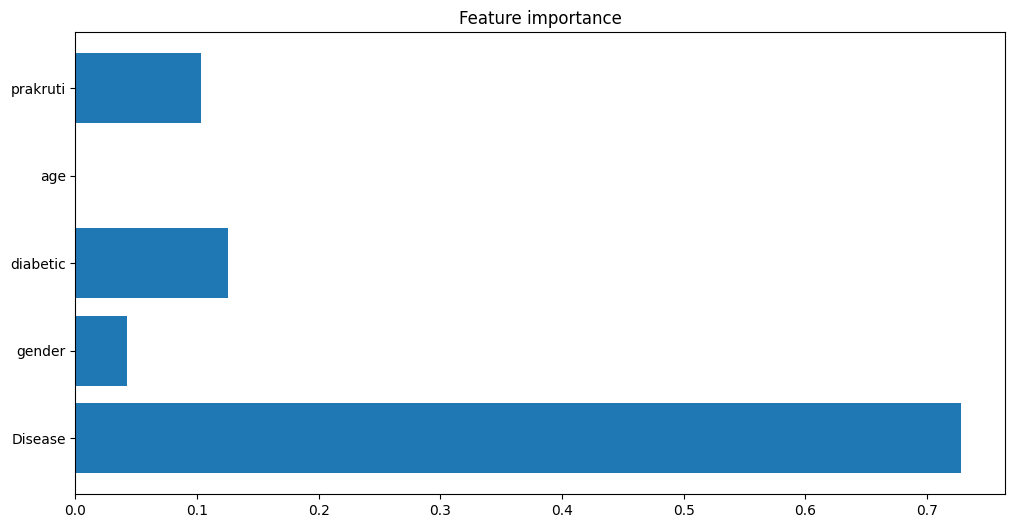

In [ ]:
plot_feature_importance(AyurMed, inputs)